<a href="https://colab.research.google.com/github/jessifebria/TSP_Rute_Penyebaran_Vaksin_Yogyakarta/blob/main/TSP_Rute_Penyebaran_Vaksin_Yogyakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.


# tsp

<table align="left">
<td>
<a href="https://colab.research.google.com/github/google/or-tools/blob/master/examples/notebook/constraint_solver/tsp.ipynb"><img src="https://raw.githubusercontent.com/google/or-tools/master/tools/colab_32px.png"/>Run in Google Colab</a>
</td>
<td>
<a href="https://github.com/google/or-tools/blob/master/ortools/constraint_solver/samples/tsp.py"><img src="https://raw.githubusercontent.com/google/or-tools/master/tools/github_32px.png"/>View source on GitHub</a>
</td>
</table>

First, you must install [ortools](https://pypi.org/project/ortools/) package in this colab.

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 15.3MB/s 
     |████████████████████████████████| 14.8MB 301kB/s 


In [2]:
!pip install ortools

     |████████████████████████████████| 14.0MB 173kB/s 
     |████████████████████████████████| 133kB 46.0MB/s 
     |████████████████████████████████| 1.0MB 45.5MB/s 
ERROR: tensorflow-metadata 0.25.0 has requirement absl-py<0.11,>=0.9, but you'll have absl-py 0.11.0 which is incompatible.
  Found existing installation: absl-py 0.10.0
    Uninstalling absl-py-0.10.0:
      Successfully uninstalled absl-py-0.10.0
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:


from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('/content/drive/My Drive/DATA.csv')
dataused = data[['NamaFaskes','LatLongFaskes','AlamatFaskes', 'KotaKab']]

dataused.head(60)



,NamaFaskes,LatLongFaskes,AlamatFaskes,KotaKab
0,RSU Rizki Amalia Medika\r\n ...,"http://maps.google.co.id/?q=-7.887368,110.074488",Jl. Brosot-Wates Km 5 Jogahan,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
1,RSu Kharisma Paramedika\r\n ...,"http://maps.google.co.id/?q=-7.864705,110.15399","Jl. Khuduri No. 34, Wates",Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
2,RSU Rizki Amalia\r\n \r\n ...,"http://maps.google.co.id/?q=-7.887412,110.085014",Jl Wates Purworejo Km 10,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
3,RS Santo Yusup Boro\r\n \r\...,"http://maps.google.co.id/?q=-7.695678,110.223358",Boro Banjarasri Kalibawang,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
4,RSUD Nyi Ageng Serang\r\n \...,"http://maps.google.co.id/?q=-7.821112,110.225525","Jl. Sentolo -Muntilan Km 0,3",Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
5,RSUD Wates\r\n \r\n ...,"http://maps.google.co.id/?q=-7.86942,110.1413",Jl. Tentara Pelajar Km.1 No.5,Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n...
6,RS Nur Hidayah\r\n \r\n ...,"http://maps.google.co.id/?q=-7.8872189,110.384...","Jl. Imogiri Timur Km 11,5",Kode Faskes dan Alamat Rumah Sakit BPJS di Kab...
7,RS Permata Husada\r\n \r\n ...,"http://maps.google.co.id/?q=-7.865656,110.408108",Raya Pleret Km 4,Kode Faskes dan Alamat Rumah Sakit BPJS di Kab...
8,RS Rachma Husada\r\n \r\n ...,"http://maps.google.co.id/?q=-7.829642,110.367641",Parangtritis Km.16 Gerselo Pat,Kode Faskes dan Alamat Rumah Sakit BPJS di Kab...
9,RS Rajawali Citra Bantul\r\n ...,"http://maps.google.co.id/?q=-7.864631,110.408324","Pleret km 2,5",Kode Faskes dan Alamat Rumah Sakit BPJS di Kab...


In [5]:
dataused.drop(dataused.index[14], inplace=True)

dataused.reset_index(drop=True, inplace=True)              

dataused['NamaFaskes'] = dataused['NamaFaskes'].str.replace("\r\n","")
dataused.loc[dataused['KotaKab'].str.split("Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n ").str.get(0) != "Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n ", 
             'KotaKab'] =  dataused['KotaKab'].str.split('Kode Faskes dan Alamat Rumah Sakit BPJS di').str.get(1)
dataused.loc[dataused['KotaKab'].str.split("Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n ").str.get(0) == "Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n ", 
             'KotaKab'] =  dataused['KotaKab'].str.split('Kode Faskes dan Alamat Rumah Sakit BPJS di\r\n ').str.get(1)

dataused['KotaKab'] = dataused['KotaKab'].str.replace("\r\n", "")
 
dataused.head(60)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(

,NamaFaskes,LatLongFaskes,AlamatFaskes,KotaKab
0,RSU Rizki Amalia Medika ...,"http://maps.google.co.id/?q=-7.887368,110.074488",Jl. Brosot-Wates Km 5 Jogahan,Kab. Kulon Progo
1,RSu Kharisma Paramedika ...,"http://maps.google.co.id/?q=-7.864705,110.15399","Jl. Khuduri No. 34, Wates",Kab. Kulon Progo
2,RSU Rizki Amalia ...,"http://maps.google.co.id/?q=-7.887412,110.085014",Jl Wates Purworejo Km 10,Kab. Kulon Progo
3,RS Santo Yusup Boro ...,"http://maps.google.co.id/?q=-7.695678,110.223358",Boro Banjarasri Kalibawang,Kab. Kulon Progo
4,RSUD Nyi Ageng Serang ...,"http://maps.google.co.id/?q=-7.821112,110.225525","Jl. Sentolo -Muntilan Km 0,3",Kab. Kulon Progo
5,RSUD Wates ...,"http://maps.google.co.id/?q=-7.86942,110.1413",Jl. Tentara Pelajar Km.1 No.5,Kab. Kulon Progo
6,RS Nur Hidayah ...,"http://maps.google.co.id/?q=-7.8872189,110.384...","Jl. Imogiri Timur Km 11,5",Kab. Bantul
7,RS Permata Husada ...,"http://maps.google.co.id/?q=-7.865656,110.408108",Raya Pleret Km 4,Kab. Bantul
8,RS Rachma Husada ...,"http://maps.google.co.id/?q=-7.829642,110.367641",Parangtritis Km.16 Gerselo Pat,Kab. Bantul
9,RS Rajawali Citra Bantul ...,"http://maps.google.co.id/?q=-7.864631,110.408324","Pleret km 2,5",Kab. Bantul


In [6]:
datatsp = []
i=0

for i in range(0,len(dataused)):
  temparray = dataused['LatLongFaskes'][i].lstrip(' ')[28:].split(',')
  temp = []
  for dataa in temparray:
    temp.append(float(dataa))
  datatsp.append(tuple(temp))
  i+=1

datatsp

[(-7.887368, 110.074488),
 (-7.864705, 110.15399),
 (-7.887412, 110.085014),
 (-7.695678, 110.223358),
 (-7.821112, 110.225525),
 (-7.86942, 110.1413),
 (-7.8872189, 110.3849398),
 (-7.865656, 110.408108),
 (-7.829642, 110.367641),
 (-7.864631, 110.408324),
 (-7.924142, 110.318398),
 (-7.834152, 110.360331),
 (-7.83833, 110.365859),
 (-7.878542, 110.330649),
 (-7.898051, 110.31762),
 (-7.892463, 110.33773),
 (-7.768763, 110.470902),
 (-7.886655, 110.330063),
 (-7.919924, 110.558896),
 (-7.955683, 110.658579),
 (-7.989033, 110.631993),
 (-7.940548, 110.591391),
 (-7.95788, 110.603582),
 (-7.766207, 110.471968),
 (-7.767844, 110.467626),
 (-7.830227, 110.477947),
 (-7.754448, 110.405674),
 (-7.79724, 110.368754),
 (-7.769666, 110.334472),
 (-7.71405, 110.448235),
 (-7.767459, 110.342449),
 (-7.706574, 110.406364),
 (-7.75289, 110.230744),
 (-7.80821, 110.288177),
 (-7.802465, 110.317478),
 (-7.775967, 110.414858),
 (-7.743859, 110.349606),
 (-7.7570906, 110.4032922),
 (-7.747116, 110.424

In [7]:
# Copyright 2010-2018 Google LLC
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# [START program]

"""Simple Travelling Salesman Problem.

A description of the problem can be found here:
http://en.wikipedia.org/wiki/Travelling_salesman_problem.
"""

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    locations = \
            datatsp
    # Convert locations in meters using a city block dimension of 114m x 80m.
    data['locations'] = [(l[0] * 114, l[1] * 80) for l in locations]
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def create_distance_callback(data, manager):
    """Creates callback to return distance between points."""
    distances_ = {}
    index_manager_ = manager
    # precompute distance between location to have distance callback in O(1)
    for from_counter, from_node in enumerate(data['locations']):
        distances_[from_counter] = {}
        for to_counter, to_node in enumerate(data['locations']):
            if from_counter == to_counter:
                distances_[from_counter][to_counter] = 0
            else:
                distances_[from_counter][to_counter] = (
                    abs(from_node[0] - to_node[0]) +
                    abs(from_node[1] - to_node[1]))

    def distance_callback(from_index, to_index):
        """Returns the manhattan distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = index_manager_.IndexToNode(from_index)
        to_node = index_manager_.IndexToNode(to_index)
        return distances_[from_node][to_node]

    return distance_callback


result = []
distance_total = 0

def print_solution(manager, routing, assignment):
    global distance_total
    """Prints assignment on console."""
    print('Objective: {}'.format(assignment.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        result.append(manager.IndexToNode(index))
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = assignment.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    distance_total = route_distance*1.60934
    plan_output += 'Distance of the route: {} km\n'.format(distance_total)
    print(plan_output)
    


"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                       data['num_vehicles'], data['depot'])

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

# Create and register a transit callback.
distance_callback = create_distance_callback(data, manager)
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

# Solve the problem.
assignment = routing.SolveWithParameters(search_parameters)


# Print solution on console.
if assignment:
    print_solution(manager, routing, assignment)

Objective: 225
Route for vehicle 0:
 0 -> 2 -> 5 -> 1 -> 4 -> 3 -> 32 -> 33 -> 34 -> 28 -> 30 -> 36 -> 42 -> 45 -> 43 -> 44 -> 31 -> 29 -> 38 -> 26 -> 37 -> 40 -> 16 -> 23 -> 24 -> 46 -> 39 -> 35 -> 41 -> 47 -> 59 -> 55 -> 57 -> 50 -> 56 -> 27 -> 49 -> 48 -> 58 -> 51 -> 52 -> 53 -> 54 -> 8 -> 12 -> 11 -> 25 -> 18 -> 21 -> 22 -> 20 -> 19 -> 7 -> 9 -> 6 -> 15 -> 13 -> 17 -> 10 -> 14 -> 0
Distance of the route: 362.1015 km



In [8]:
data_result = []
for i in result:
    data_result.append([dataused['NamaFaskes'][i], datatsp[i][0], datatsp[i][1],dataused['AlamatFaskes'][i], dataused['KotaKab'][i]])

df_result = pd.DataFrame(data_result, columns=['Nama RS', 'Latitude', 'Longtitude', 'Alamat', 'Kota/Kabupaten'])

df_result.head()

,Nama RS,Latitude,Longtitude,Alamat,Kota/Kabupaten
0,RSU Rizki Amalia Medika ...,-7.887368,110.074488,Jl. Brosot-Wates Km 5 Jogahan,Kab. Kulon Progo
1,RSU Rizki Amalia ...,-7.887412,110.085014,Jl Wates Purworejo Km 10,Kab. Kulon Progo
2,RSUD Wates ...,-7.869420,110.141300,Jl. Tentara Pelajar Km.1 No.5,Kab. Kulon Progo
3,RSu Kharisma Paramedika ...,-7.864705,110.153990,"Jl. Khuduri No. 34, Wates",Kab. Kulon Progo
4,RSUD Nyi Ageng Serang ...,-7.821112,110.225525,"Jl. Sentolo -Muntilan Km 0,3",Kab. Kulon Progo


In [9]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame

yogya_bound = gpd.read_file("/content/drive/MyDrive/yogya/JALAN_LN_25K.shp")
bantul_bound = gpd.read_file("/content/drive/MyDrive/bantul/JALAN_LN_25K.shp")
gunungkidul_bound = gpd.read_file("/content/drive/MyDrive/gunungkidul/JALAN_LN_25K.shp")
sleman_bound = gpd.read_file("/content/drive/MyDrive/sleman/JALAN_LN_25K.shp")
kulonprogo_bound = gpd.read_file("/content/drive/MyDrive/kulonprogo/JALAN_LN_25K.shp")

crs = {'init': 'epsg:4326' }
geometry = [Point(xy) for xy in zip(df_result['Longtitude'], df_result['Latitude'])]
df_result = gpd.GeoDataFrame(df_result, crs=crs, geometry=geometry)

df_result.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Nama RS,Latitude,Longtitude,Alamat,Kota/Kabupaten,geometry
0,RSU Rizki Amalia Medika ...,-7.887368,110.074488,Jl. Brosot-Wates Km 5 Jogahan,Kab. Kulon Progo,POINT (110.07449 -7.88737)
1,RSU Rizki Amalia ...,-7.887412,110.085014,Jl Wates Purworejo Km 10,Kab. Kulon Progo,POINT (110.08501 -7.88741)
2,RSUD Wates ...,-7.869420,110.141300,Jl. Tentara Pelajar Km.1 No.5,Kab. Kulon Progo,POINT (110.14130 -7.86942)
3,RSu Kharisma Paramedika ...,-7.864705,110.153990,"Jl. Khuduri No. 34, Wates",Kab. Kulon Progo,POINT (110.15399 -7.86470)
4,RSUD Nyi Ageng Serang ...,-7.821112,110.225525,"Jl. Sentolo -Muntilan Km 0,3",Kab. Kulon Progo,POINT (110.22553 -7.82111)


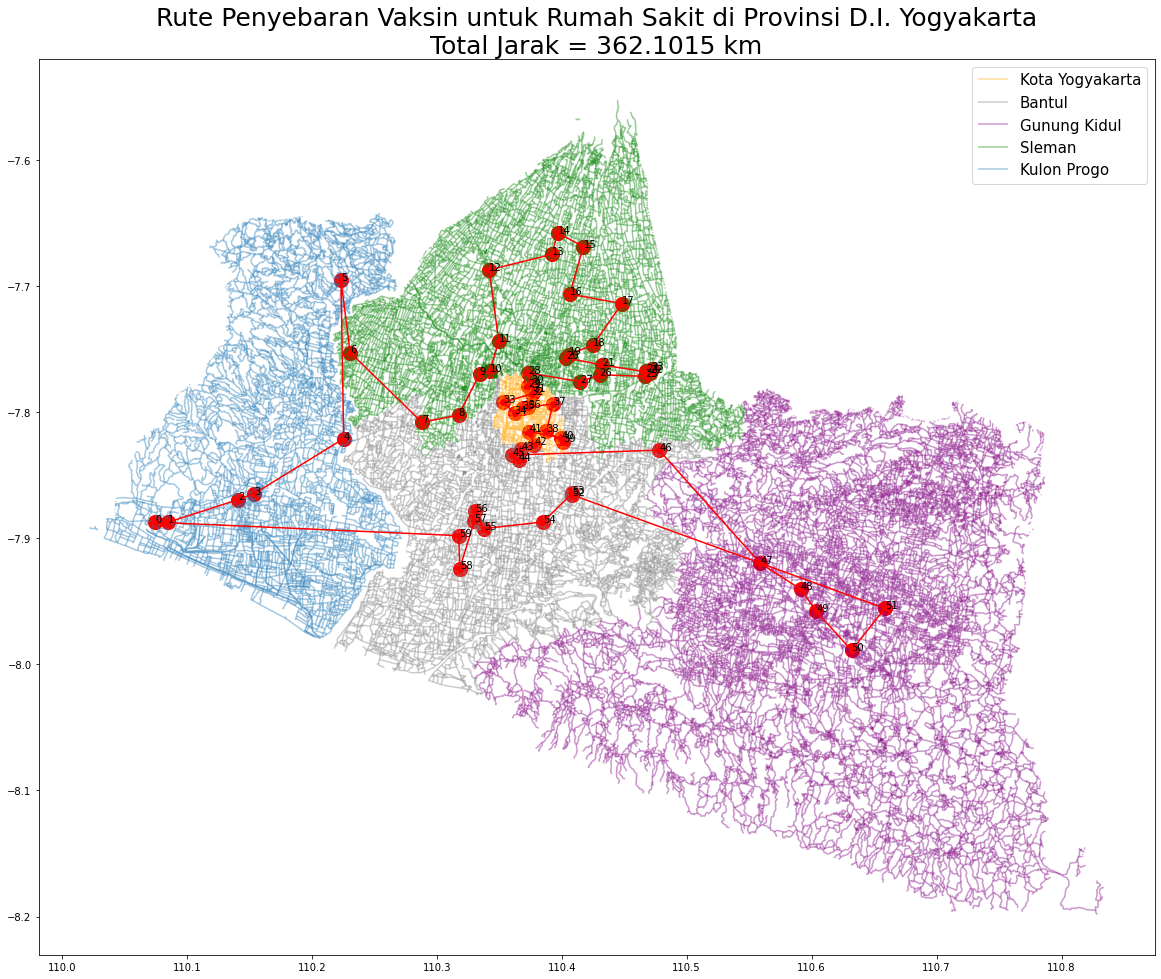

In [10]:
fig, ax = plt.subplots(figsize = (20,20))
yogya_bound.plot(color='orange', ax=ax, alpha = 0.4, label="Kota Yogyakarta" )
bantul_bound.plot(color='grey', ax=ax, alpha = 0.4, label= "Bantul" )
gunungkidul_bound.plot(color='purple', ax=ax, alpha = 0.4, label= "Gunung Kidul")
sleman_bound.plot(color='green', ax=ax, alpha = 0.4, label= "Sleman" )
kulonprogo_bound.plot( ax=ax, alpha = 0.4, label="Kulon Progo" )
df_result.geometry.plot(ax=ax, color = 'red', markersize = 200, alpha=1)
plt.plot(df_result.Longtitude, df_result.Latitude, 'ro-')
plt.plot([df_result.Longtitude[59],df_result.Longtitude[0]],[df_result.Latitude[59],df_result.Latitude[0]], 'ro-' )
for i in range(0, df_result.shape[0]):
  temp = []
  temp.append(df_result.Longtitude[i])
  temp.append(df_result.Latitude[i])
  plt.annotate(str(i),tuple(temp))
plt.title('Rute Penyebaran Vaksin untuk Rumah Sakit di Provinsi D.I. Yogyakarta\nTotal Jarak = '+str(distance_total)+' km', fontdict = {'fontsize' : 25})
plt.legend(prop={'size': 15})
plt.show()

In [11]:
df_nama_rs = pd.DataFrame(df_result[["Nama RS", "Alamat", "Kota/Kabupaten"]] )

df_nama_rs.head(60)

,Nama RS,Alamat,Kota/Kabupaten
0,RSU Rizki Amalia Medika ...,Jl. Brosot-Wates Km 5 Jogahan,Kab. Kulon Progo
1,RSU Rizki Amalia ...,Jl Wates Purworejo Km 10,Kab. Kulon Progo
2,RSUD Wates ...,Jl. Tentara Pelajar Km.1 No.5,Kab. Kulon Progo
3,RSu Kharisma Paramedika ...,"Jl. Khuduri No. 34, Wates",Kab. Kulon Progo
4,RSUD Nyi Ageng Serang ...,"Jl. Sentolo -Muntilan Km 0,3",Kab. Kulon Progo
5,RS Santo Yusup Boro ...,Boro Banjarasri Kalibawang,Kab. Kulon Progo
6,RSU Panti Bhaktiningsih ...,"Jl Godean-Gedongan,Sendangmuly",Kab. Sleman
7,RSU Mitra Sehat ...,"Jalan Wates Km 9, Ngaran",Kab. Sleman
8,PKU Muhammadiyah Gamping ...,"JL.Wates Km.5,5, Ambarketawang",Kab. Sleman
9,RS Queen Latifa ...,Jalan Siliwangi (Ring Road Bar,Kab. Sleman
